In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
img1 = cv2.imread('source/1.1/tv20171228114454W1YS1F.jpg')  # 替换为你的第一张图片路径
img2 = cv2.imread('source/1.1/tv201712271646576FW62O.jpg')  # 替换为你的第二张图片路径

# 将图片转换为灰度图像
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

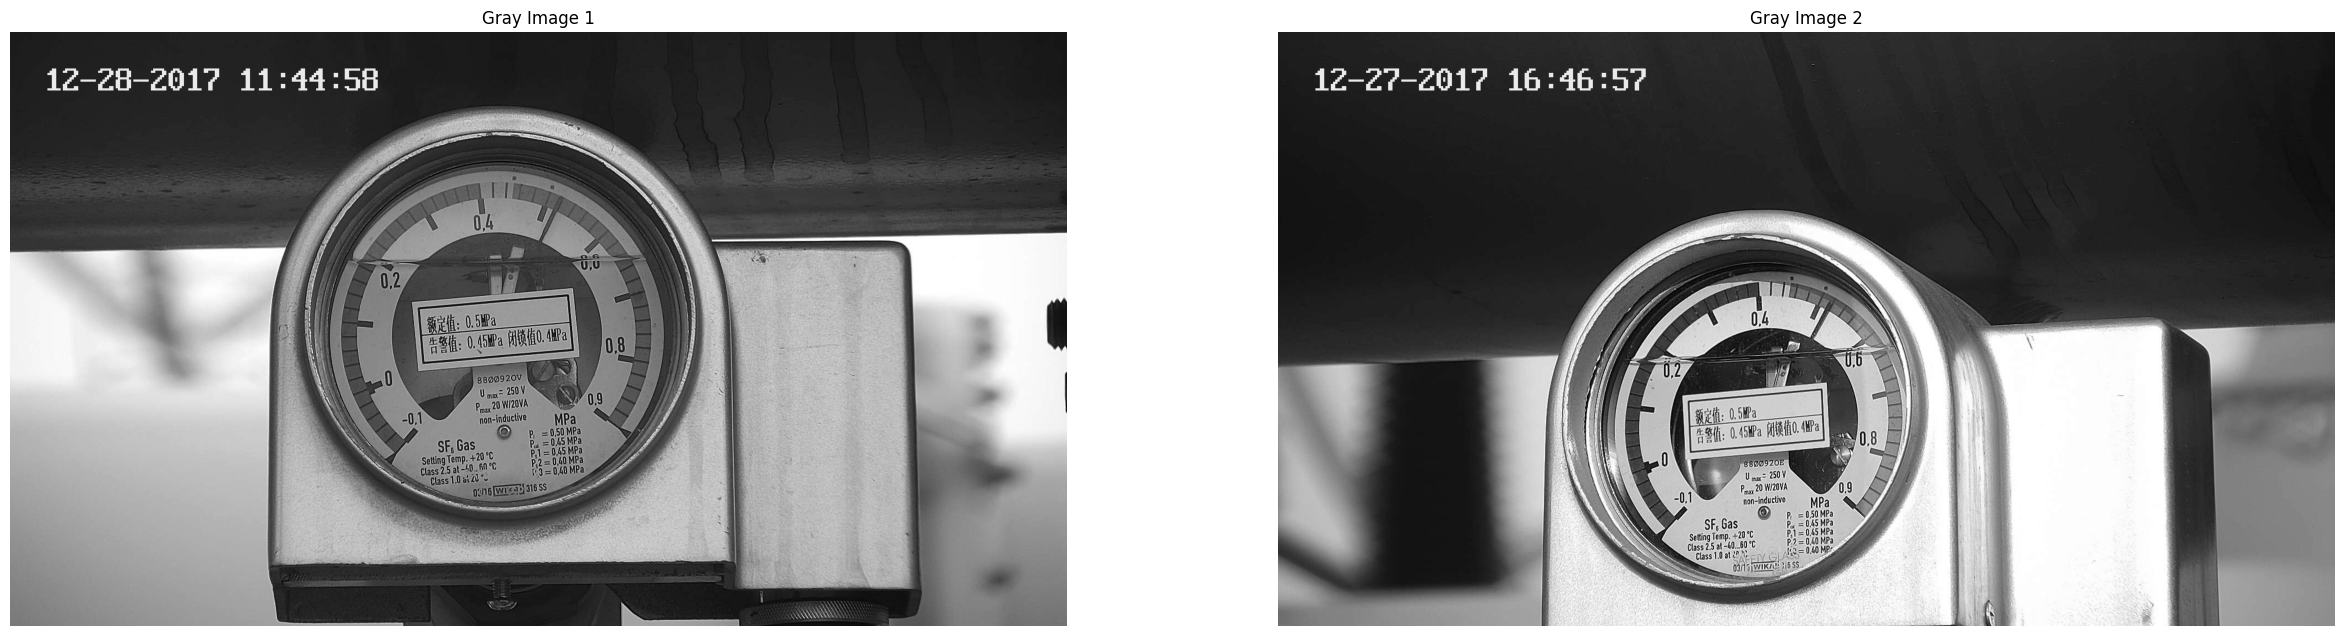

In [3]:
# 使用 matplotlib 展示图片
plt.figure(figsize=(30, 15))

# 显示第一张灰度图
plt.subplot(1, 2, 1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Gray Image 1')
plt.axis('off')  # 关闭坐标轴

# 显示第二张灰度图
plt.subplot(1, 2, 2)
plt.imshow(gray_img2, cmap='gray')
plt.title('Gray Image 2')
plt.axis('off')  # 关闭坐标轴

# 展示图片
plt.show()

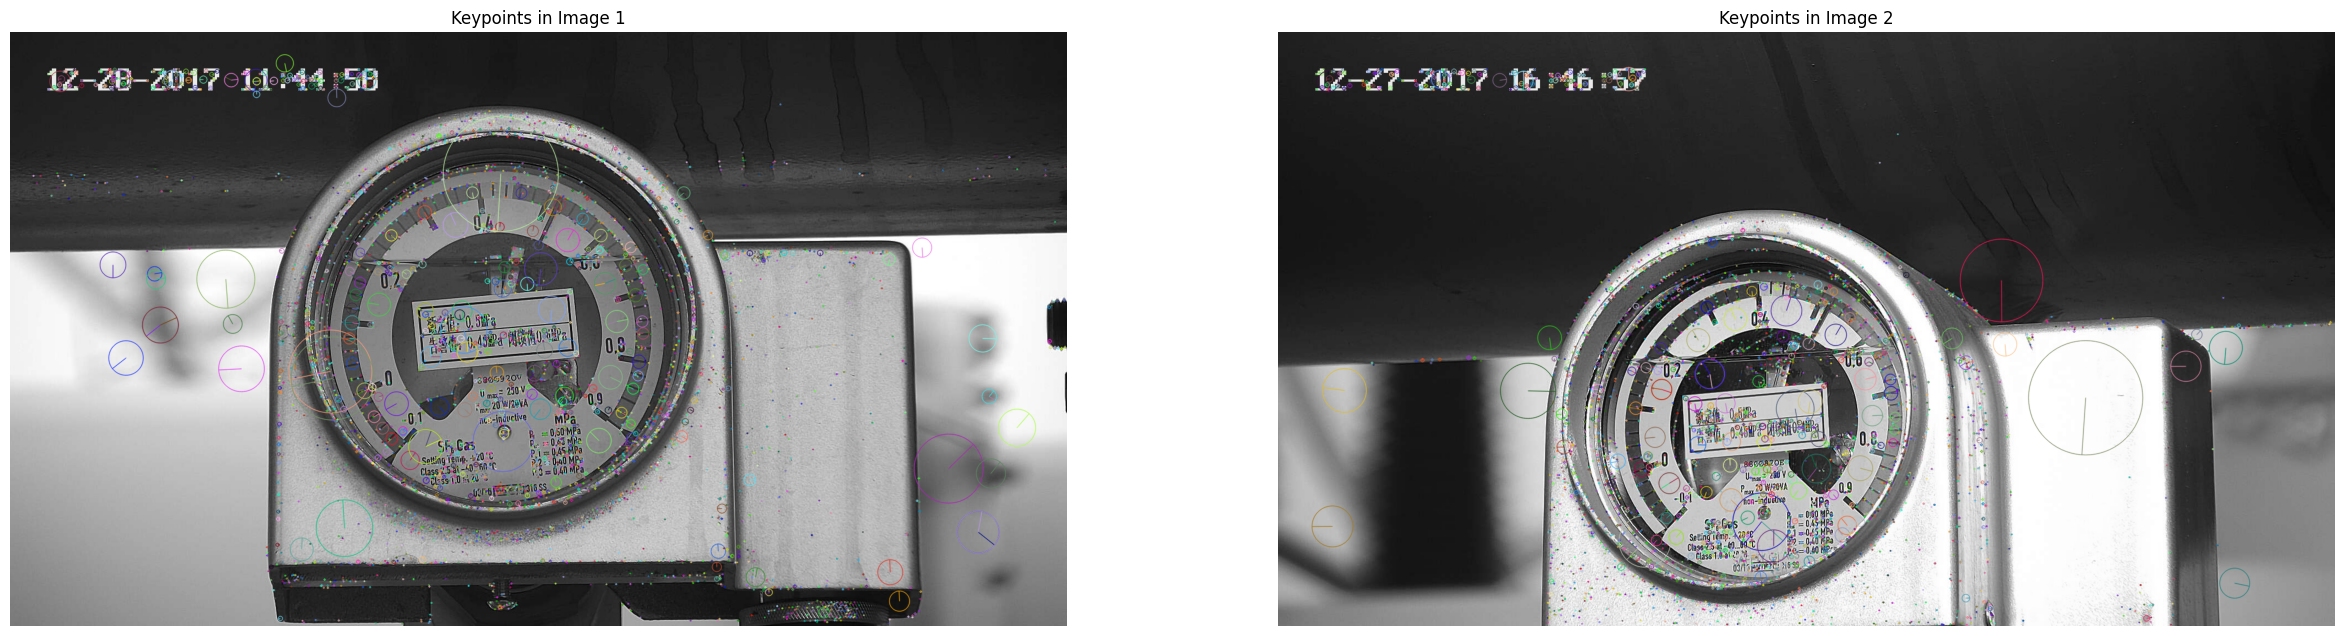

In [4]:
# 使用SIFT检测特征点和计算描述符
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_img2, None)

# 显示特征点
img1_with_keypoints = cv2.drawKeypoints(gray_img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_keypoints = cv2.drawKeypoints(gray_img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1_with_keypoints, cmap='gray')
plt.title('Keypoints in Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_with_keypoints, cmap='gray')
plt.title('Keypoints in Image 2')
plt.axis('off')

plt.show()

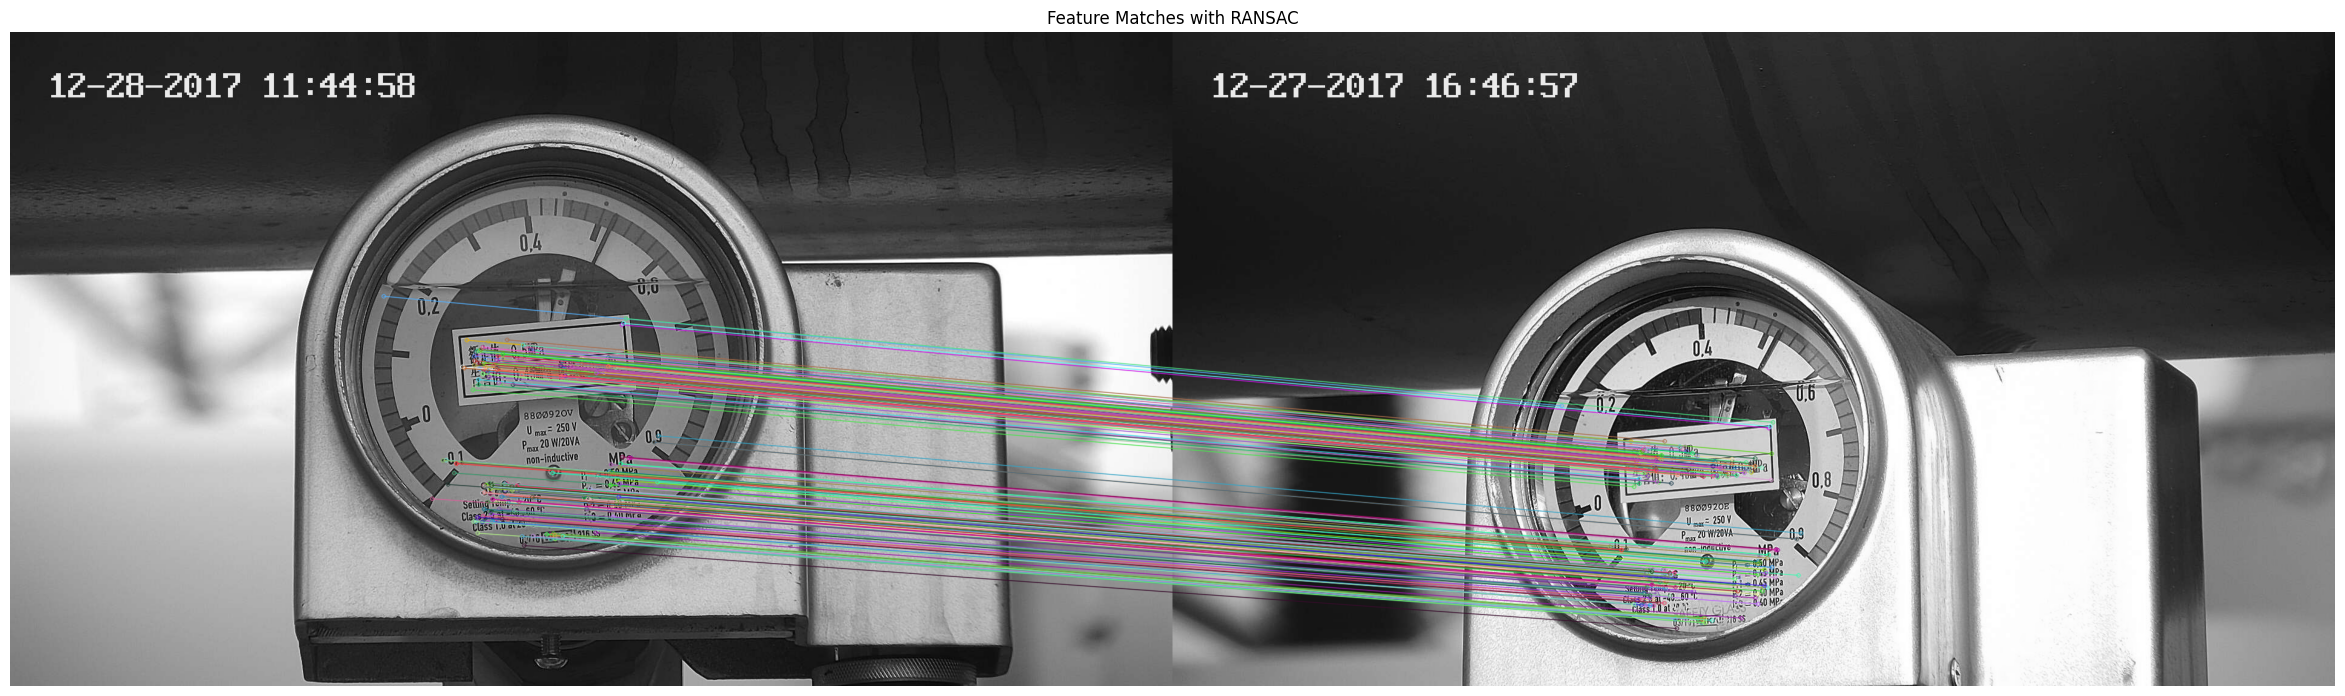

In [5]:
# 使用 BFMatcher 进行匹配
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# 根据匹配距离排序，优先选择最好的匹配
matches = sorted(matches, key=lambda x: x.distance)

# 提取好的匹配的点的坐标
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# 利用 RANSAC 方法估计单应矩阵
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

# 使用 mask 来选出内点匹配
matches_mask = mask.ravel().tolist()

# 投影图1的点到图2
projected_points1 = cv2.perspectiveTransform(points1, H)

# 画出投影后的点和原始点的匹配情况
result_img = cv2.drawMatches(gray_img1, keypoints1, gray_img2, keypoints2, 
                             [m for i, m in enumerate(matches) if matches_mask[i]], 
                             None, 
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.figure(figsize=(30, 15))
plt.imshow(result_img)
plt.title('Feature Matches with RANSAC')
plt.axis('off')
plt.show()

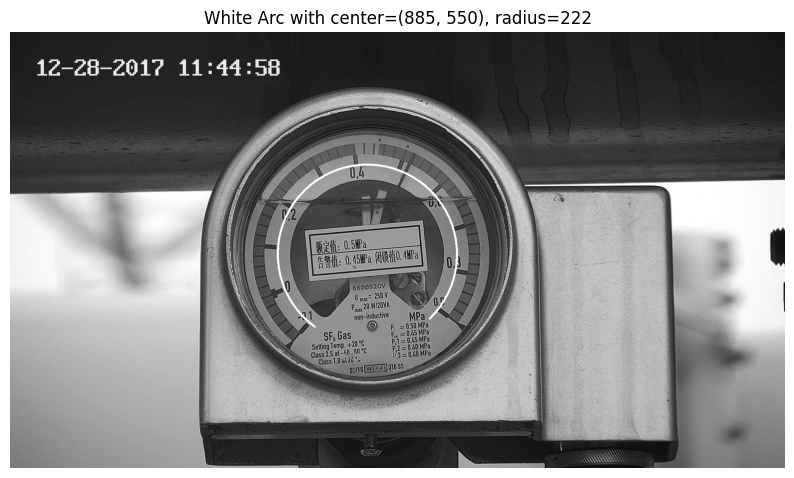

(1080, 1920)


In [6]:
start_angle = 132 - 6
end_angle = 400 + 6

# 定义绘制白色圆弧并展示图像的函数
def draw_white_arc_on_gray_image(image, x, y, r):
    """
    在灰度图像的 (x, y) 位置绘制一个半径为 r 的白色圆弧，并展示图像。

    参数:
    - image: 输入的灰度图像
    - x: 圆弧的中心 x 坐标
    - y: 圆弧的中心 y 坐标
    - r: 圆弧的半径
    - start_angle: 圆弧的起始角度（默认为0度）
    - end_angle: 圆弧的结束角度（默认为180度）
    """
    # 在灰度图像上绘制白色圆弧，颜色为255 (白色)
    center = (x, y)
    temp_img = image

    
    cv2.ellipse(temp_img, center, (r, r), 0, start_angle, end_angle, 255, 3)
    
    # 使用 Matplotlib 显示结果
    plt.figure(figsize=(10, 6))
    plt.imshow(temp_img, cmap='gray')  # 显示为灰度图像
    plt.title(f'White Arc with center=({x}, {y}), radius={r}')
    plt.axis('off')
    plt.show()

# 示例：创建一个空白的灰度图像并在指定位置绘制白色圆弧
draw_white_arc_on_gray_image(gray_img1, x=885, y=550, r=222) 
print(gray_img1.shape)

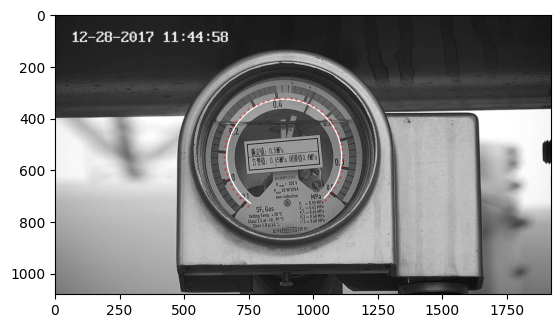

In [7]:
def get_arc_points(center, r, start_angle, end_angle, num_points):
    cx, cy = center
    # 将角度转换为弧度
    start_angle_rad = np.deg2rad(start_angle)
    end_angle_rad = np.deg2rad(end_angle)
    
    # 生成从 start_angle 到 end_angle 之间等间隔的角度
    angles = np.linspace(start_angle_rad, end_angle_rad, num_points)
    
    # 计算圆弧上的点的坐标
    points = [(int(cx + r * np.cos(angle)), int(cy + r * np.sin(angle))) for angle in angles]
    
    return points

# 圆心坐标和半径
center = (885,550)
r = 230


# 生成圆弧上的500个点
arc_points = get_arc_points(center, r, start_angle, end_angle, 500 + 20 +1)

# 使用matplotlib绘制图像
plt.imshow(gray_img1, cmap='gray')

# 提取x和y坐标
x_coords = [point[0] for point in arc_points[::10]]
y_coords = [point[1] for point in arc_points[::10]]


# 在图像上绘制圆弧上的点
plt.scatter(x_coords, y_coords, color='red', s=0.1)

# 显示图像
plt.show()

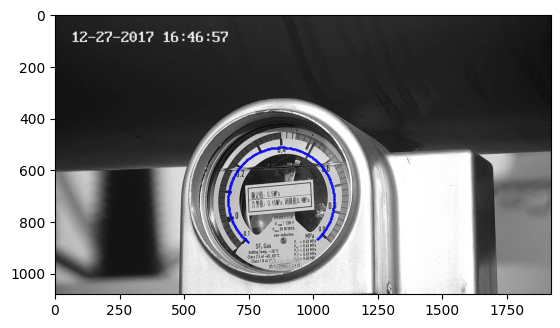

In [8]:
arc_points_np = np.float32(arc_points).reshape(-1, 1, 2)
# 使用单应矩阵 H 将圆弧上的点进行投影
projected_points = cv2.perspectiveTransform(arc_points_np, H)
# 提取投影后的点的坐标
projected_points_list = projected_points.reshape(-1, 2)
# 提取投影后的x和y坐标
x_coords_projected = [int(point[0]) for point in projected_points_list]
y_coords_projected = [int(point[1]) for point in projected_points_list]

plt.imshow(gray_img2, cmap='gray')
plt.scatter(x_coords_projected, y_coords_projected, color='blue', s=0.1, label="Projected Points")

In [9]:
alpha = [0 for i in range(501)]
for i in range(10, 510 + 1): 
    sum_k, cnt_empty = 0, 0
    for j in range(1,10 + 1):
        
        delta_y = y_coords_projected[i+j] - y_coords_projected[i-j]
        delta_x = x_coords_projected[i+j] - x_coords_projected[i-j]
        
        if math.fabs(delta_x) < 1e-6: cnt_empty += 1
        else:
            sum_k += delta_y / delta_x
    
    if cnt_empty > 5 : alpha[i - 10] = 0.0
    else: 
        k_i =  sum_k / ( 10 - cnt_empty )
        if math.fabs(k_i) < 1e-6 : alpha[i - 10] = 90.0
        else: alpha[i - 10] = math.atan(-1 / k_i) * 180 / math.pi

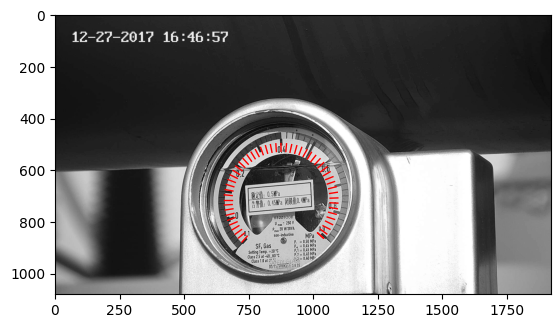

In [10]:
# Function to draw a line at point (x, y) with angle alpha relative to the horizontal
w = 30

def draw_line(x, y, angle_deg, length=w):
    angle_rad = math.radians(angle_deg)  # Convert the angle to radians
    
    # Calculate the end points based on the line length
    x_end = x + length * math.cos(angle_rad) / 2
    y_end = y + length * math.sin(angle_rad) / 2
    x_st = x - length * math.cos(angle_rad) / 2
    y_st = y - length * math.sin(angle_rad) / 2
    # Draw the line using plt.plot
    plt.plot([x_st, x_end], [y_st, y_end], color='red', linewidth=1)

# Display the grayscale image
plt.imshow(gray_img2, cmap='gray')

# Example to draw lines for multiple points
for i in range(0,len(alpha),10):
    x = x_coords_projected[i + 10]
    y = y_coords_projected[i + 10]
    
    draw_line(x, y, alpha[i])
draw_line(x_coords_projected[500 + 10], y_coords_projected[500 + 10], alpha[500])
# Show the plot
plt.show()

In [11]:

def draw_zone(gray_img, x, y, angle):
    
    x_min = max(0, x - w // 2)
    x_max = min(gray_img2.shape[1], x + w // 2)
    y_min = max(0, y - w // 2)
    y_max = min(gray_img2.shape[0], y + w // 2)
    for ty in range(y_min, y_max):
        for tx in range(x_min, x_max):
            if ((tx-x)**2 + (ty-y)**2) > w*w//4 : continue

            px, py = tx - x, ty - y
            # 计算该点 (px, py) 相对于水平线（x轴）的角度
            point_angle = math.atan2(py, px)

            # 计算该点的角度相对于给定的直线 `angle` 的差
            angle_difference = abs(point_angle - angle)

            # 将角度差归一化到 [0, pi] 范围内，考虑正负角的影响
            angle_difference = min(angle_difference, 2 * math.pi - angle_difference)

            # 如果角度差小于 45 度（弧度：π/4），则将该像素设置为黑色
            if angle_difference < math.radians(45) or angle_difference > math.radians(135):
                gray_img2[ty, tx] = 0  # 将像素设置为黑色

    # Display the modified image



734 866 49924
691 805 69387
671 733 68211
678 659 65534
712 592 47121
767 542 75254
837 515 74246
913 515 74080
985 543 61952
1041 596 46534
1074 667 62574
1078 746 60943
1051 821 67151


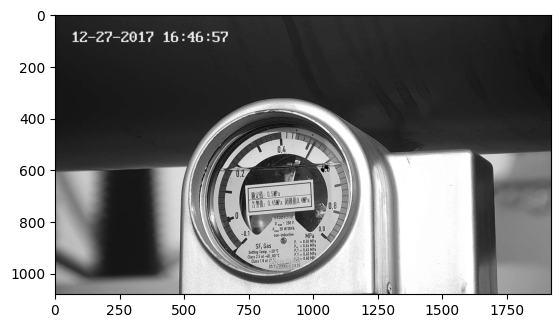

In [12]:


# Loop through points (x, y)
res_x, res_y, res_angle, min_pixel_sum = 0,0,0,1e9

for i in range(0, len(alpha), 40):
    
    x = x_coords_projected[i + 10]
    y = y_coords_projected[i + 10]
    
    x_min = max(0, x - w // 2)
    x_max = min(gray_img2.shape[1], x + w // 2)
    y_min = max(0, y - w // 2)
    y_max = min(gray_img2.shape[0], y + w // 2)
    angle = math.radians(alpha[i])

    pixel_sum = 0

    for ty in range(y_min, y_max):
        for tx in range(x_min, x_max):
            if ((tx-x)**2 + (ty-y)**2) > w*w//4 : continue

            px, py = tx - x, ty - y
            # 计算该点 (px, py) 相对于水平线（x轴）的角度
            point_angle = math.atan2(py, px)

            # 计算该点的角度相对于给定的直线 `angle` 的差
            angle_difference = abs(point_angle - angle)

            # 将角度差归一化到 [0, pi] 范围内，考虑正负角的影响
            angle_difference = min(angle_difference, 2 * math.pi - angle_difference)

            if angle_difference < math.radians(45) or angle_difference > math.radians(135):
                pixel_sum += gray_img2[ty, tx] 

    # print(x, y, pixel_sum)
    # draw_zone(gray_img2, x, y, angle)
    print(x, y, pixel_sum)

    if pixel_sum < min_pixel_sum:
        res_x, res_y, res_angle, min_pixel_sum = x, y, angle, pixel_sum
        # draw_zone(gray_img2, res_x, res_y, res_angle)


draw_zone(gray_img2, res_x, res_y, res_angle)
plt.imshow(gray_img2, cmap='gray')
plt.show()     
